In [1]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt

# Apartment Prices

In [2]:
# import data
apartment_df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv")

In [3]:
apartment_df.head()

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
0,3995000,4467.0,73.0,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,3820000,...,59.371033,18.054057,NaN,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/
1,1995000,1773.0,36.0,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,2355000,...,59.371242,18.057821,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
2,5100000,3839.0,81.0,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,6110000,...,59.371617,18.054716,NaN,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/
3,5495000,4483.0,107.0,4.0,2018-08-25 02:56:56,1936.0,Lägenhet,3224374,2018-09-06,8050000,...,59.371480,18.053880,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
4,1995000,1696.0,29.0,1.0,2018-06-15 17:16:19,1936.0,Lägenhet,3185496,2018-06-18,2400000,...,59.372160,18.053542,True,Stockholm,Stockholms län,166,Mäklarhuset,204,Broker,http://www.maklarhuset.se/


Price is in skr and area is in m^2, so ppsqm has the unit skr/m^2.
Sorting by ppsqm gives us the most expensive apartments by ppsqm

In [4]:
apartment_df["ppsqm"] = (apartment_df["soldPrice"] / apartment_df["livingArea"])
apartment_df[["listPrice","livingArea","ppsqm"]] \
        .sort_values("ppsqm", ascending = False).head()

,listPrice,livingArea,ppsqm
67,1595000,24.0,104166.666667
50,1890000,24.0,102083.333333
54,1795000,23.0,100000.000000
34,1750000,25.0,88400.000000
55,1895000,26.9,85501.858736


In [5]:
# the .mean() method gives us the mean over a collumn
apartment_df["ppsqm"].mean()

58759.382760081724

I noticed that the highest ppsqm were for relatively small apartments, so I decided to order by living area and confirmed that they were some of the smallest apartments. This technically means that very large apartments are more worth the money for the area you get.

In [6]:
apartment_df[["listPrice","livingArea","ppsqm"]] \
        .sort_values("livingArea", ascending = False)

,listPrice,livingArea,ppsqm
59,8500000,152.0,60855.263158
68,6450000,138.0,46739.130435
106,5795000,131.0,42748.091603
107,5950000,128.3,46960.249415
5,7495000,125.0,71600.000000
...,...,...,...
67,1595000,24.0,104166.666667
155,1450000,23.0,63043.478261
54,1795000,23.0,100000.000000
150,1300000,20.0,65000.000000


# The Swedish Election of 2018

In [7]:
# import data
# Note that the decimal = "," argument is needed to have the numbers be converted to floats
election_df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv", sep=";", decimal = ",")
election_df.head()

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
0,1,14,Stockholms län,Upplands Väsby,23.11,6.26,5.66,6.71,26.97,8.01,...,NaN,NaN,NaN,0.04,0.69,0.06,25830,26036,30740,84.70
1,1,15,Stockholms län,Vallentuna,28.29,10.11,7.73,7.58,18.91,4.47,...,0.0,NaN,0.00,0.02,0.59,0.08,20952,21099,23438,90.02
2,1,17,Stockholms län,Österåker,29.68,9.35,7.48,7.13,19.71,4.97,...,NaN,NaN,0.01,0.03,0.69,0.13,27711,27947,31309,89.26
3,1,20,Stockholms län,Värmdö,27.49,9.76,6.40,5.89,20.48,6.02,...,NaN,NaN,0.01,0.04,0.67,0.07,28115,28335,31371,90.32
4,1,23,Stockholms län,Järfälla,23.96,6.31,6.04,6.29,27.68,8.75,...,0.0,NaN,0.02,0.04,0.53,0.07,45654,45948,53230,86.32


In [8]:
# summing all legitimate votes
election_df.loc[election_df.LÄNSNAMN == "Stockholms län"]\
    ["RÖSTER GILTIGA"].sum()

1426237

selecting the municipality collumns and sorting by S gives us the highest voting percantage for S. In this data it was Munkfors in Värmland.

In [9]:
election_df[["LÄNSNAMN","KOMMUNNAMN","S"]].sort_values(by = "S",ascending = False)

,LÄNSNAMN,KOMMUNNAMN,S
188,Värmlands län,Munkfors,52.18
286,Norrbottens län,Piteå,47.48
196,Värmlands län,Hagfors,47.46
279,Norrbottens län,Överkalix,46.68
280,Norrbottens län,Kalix,45.37
...,...,...,...
133,Hallands län,Kungsbacka,16.32
13,Stockholms län,Täby,13.99
21,Stockholms län,Lidingö,12.35
98,Skåne län,Vellinge,10.58


The municipalities can be easily sorted on voting participation. .head(3) gives us the top three.

In [10]:
election_df[["LÄNSNAMN","KOMMUNNAMN","VALDELTAGANDE"]].sort_values("VALDELTAGANDE", ascending = False).head(3)

,LÄNSNAMN,KOMMUNNAMN,VALDELTAGANDE
103,Skåne län,Lomma,93.86
59,Jönköpings län,Habo,93.35
98,Skåne län,Vellinge,93.13


# Predicting Strokes

In [11]:
# import data
stroke_df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


I was interested in the ratio of people that have had a stroke to those who haven't based on their smoking status. I used .value_counts to count the amount of each and plotted the corresponding franctions.

In [12]:
dada = stroke_df.value_counts(subset=["smoking_status","stroke"])

# indeces are sorted so we can calculate the fractions
temp1 = dada.loc[(slice(None), [0])].sort_index()
temp2 = dada.loc[(slice(None), [1])].sort_index()
temp1

smoking_status   stroke
Unknown          0         1497
formerly smoked  0          815
never smoked     0         1802
smokes           0          747
Name: count, dtype: int64

<BarContainer object of 4 artists>

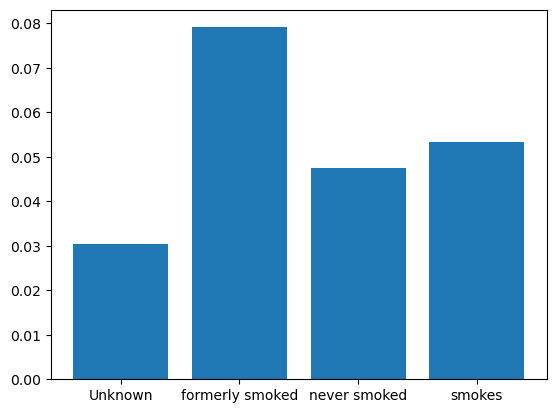

In [13]:
plt.bar(
    ["Unknown", "formerly smoked", "never smoked", "smokes"],
    temp2.values/(temp1.values+temp2.values)
)

Here we see something interesting. We difference between the cotegories "never smoked" and "smokes" is relatively small, but "formerly smoked" is much higher that the others.

This is a bit unintuitive but can be explained by smokers having lower life expectancy. Less time alive means less time to get a stroke. Thus the category "formerly smoked" lives long enough to experience the increased chance of stroke from smoking, whereas the category "smokes" die by other means before that.

The unknown category is strange because the chance of getting a stroke in this category is lower than the others. This might mean there is systematic bias in our data.